IMPORTING DATASET

In [26]:
from scipy.io import arff
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

arff_file = arff.loadarff('speeddating.arff')
df = pd.DataFrame(arff_file[0])

df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

RENOMBRAR LES COLUMNES

DETERMINE REDUNDANT COLUMNS DATASET

In [27]:
# COLUMN d_age AND d_d_age CAN BE REMOVED BECAUSE IS THE RESULT OF TWO OTHER COLUMNS
df = df.drop(columns=['d_age', 'd_d_age'])

# samerace CAN BE REMOVED BEACUSE IS THE RESULT OF race AND race_o
df = df.drop(columns=['samerace'])

# WE MUST CHOOSE BETWEEN importance_same_race AND d_importance_same_race (same data but different presentation)
df = df.drop(columns=['d_importance_same_race'])

# WE MUST CHOOSE BETWEEN importance_same_religion AND d_importance_same_religion (same data but different presentation)
df = df.drop(columns=['d_importance_same_religion'])

# MUST BE REMOVED BECAUSE IS REPEATED 

df = df.drop(columns=[
    'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence','d_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests',
    'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o',
    'd_attractive_important', 'd_sincere_important', 'd_intellicence_important', 'd_funny_important', 'd_ambtition_important', 'd_shared_interests_important',
    'd_attractive', 'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition',
    'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner',
    'd_sports', 'd_tvsports', 'd_exercise','d_dining', 'd_museums', 'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv', 'd_theater', 'd_movies', 'd_concerts', 'd_music', 'd_shopping', 'd_yoga',
    'd_interests_correlate',
    'd_expected_happy_with_sd_people', 'd_expected_num_interested_in_me', 'd_expected_num_matches',
    'd_like', 'd_guess_prob_liked'])

# THE COLUMN MATCH MUST BE REMOVED BECAUSE IS THE RESULT OF OThER TWO
# df = df.drop(columns=['match']) ## We need this for the prediction, is our target column

df.drop(columns=['has_null'])

df.to_csv('preprocessed.csv', index=False)

KNOW NUMBER OF NUMERICAL AND CATEGORIC / GENERAL INFO

In [28]:
types = df.dtypes

num_categoricals = (types == 'object').sum()
num_numericals = ((types == 'int64') | (types == 'float64')).sum()

print ("Number of categorical variables: ", num_categoricals)
print ("Number of numerical variables: ", num_numericals)

Number of categorical variables:  8
Number of numerical variables:  58


In [10]:
df.describe()

,wave,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
count,8378.000000,8283.000000,8274.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000
mean,11.350919,26.358928,26.364999,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,7.084733,8.294935,7.704460,8.403965,7.578388,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856
std,5.995903,3.566763,3.563648,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154,1.395783,1.407460,1.564321,1.076608,1.778315,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168
min,1.000000,18.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,4.000000,6.000000,8.000000,7.000000,7.000000,6.000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   object 
 1   wave                           8378 non-null   float64
 2   gender                         8378 non-null   object 
 3   age                            8283 non-null   float64
 4   age_o                          8274 non-null   float64
 5   race                           8378 non-null   object 
 6   race_o                         8378 non-null   object 
 7   importance_same_race           8299 non-null   float64
 8   importance_same_religion       8299 non-null   float64
 9   field                          8378 non-null   object 
 10  pref_o_attractive              8289 non-null   float64
 11  pref_o_sincere                 8289 non-null   float64
 12  pref_o_intelligence            8289 non-null   f

DETECT MISSING VALUES

In [12]:
missing_values_count = df.isnull().sum()
missing_values_percent = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Count': missing_values_count, 'Percent': missing_values_percent})
missing_data = missing_data.sort_values(by='Percent', ascending=False)

print(missing_data)

                               Count    Percent
expected_num_interested_in_me   6578  78.515159
expected_num_matches            1173  14.000955
shared_interests_o              1076  12.843161
shared_interests_partner        1067  12.735736
ambitous_o                       722   8.617809
ambition_partner                 712   8.498448
met                              375   4.476009
funny_o                          360   4.296968
funny_partner                    350   4.177608
guess_prob_liked                 309   3.688231
intelligence_o                   306   3.652423
intelligence_partner             296   3.533063
sinsere_o                        287   3.425639
sincere_partner                  277   3.306278
like                             240   2.864646
attractive_o                     212   2.530437
attractive_partner               202   2.411077
interests_correlate              158   1.885892
pref_o_shared_interests          129   1.539747
shared_interests_important       121   1

DETECT OUTLIERS

DATASET ANALYSIS

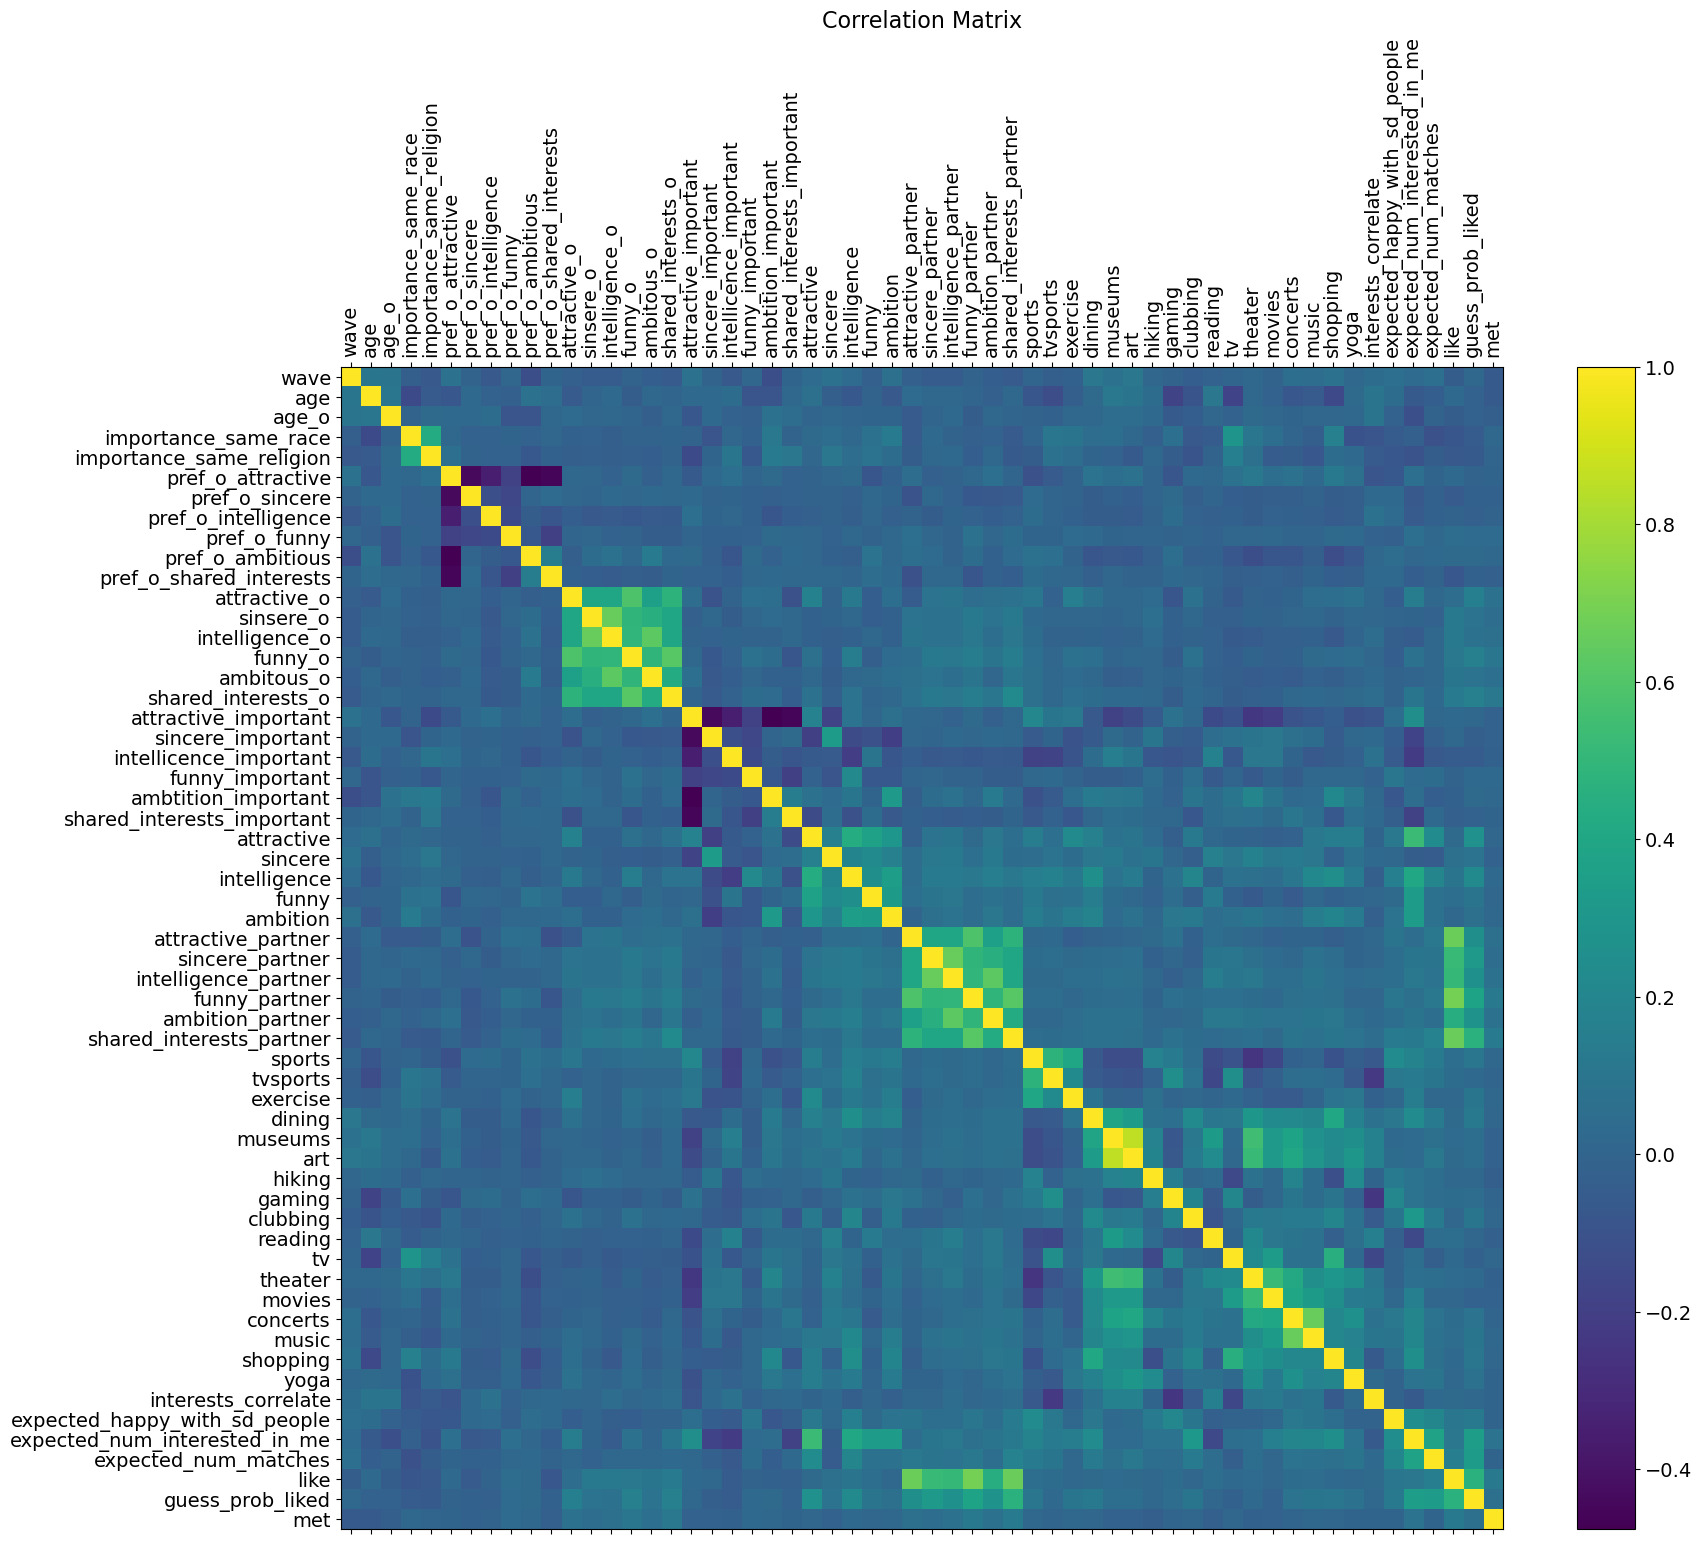

In [15]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

0    6998
1    1380
Name: match, dtype: int64


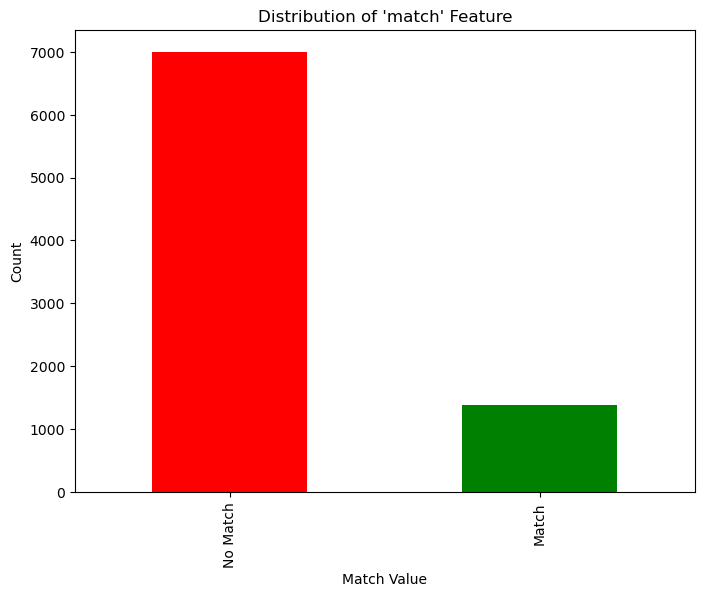

In [24]:
match_counts = df['match'].value_counts()

plt.figure(figsize=(8, 6))
match_counts.plot(kind='bar', color=['red', 'green'])  # Set colors for 0 and 1
plt.xlabel("Match Value")
plt.ylabel("Count")
plt.title("Distribution of 'match' Feature")
plt.xticks([0, 1], ['No Match', 'Match'])  # Set custom x-axis labels

print(match_counts)
plt.show()

array([[<AxesSubplot:xlabel='wave', ylabel='wave'>,
        <AxesSubplot:xlabel='age', ylabel='wave'>,
        <AxesSubplot:xlabel='age_o', ylabel='wave'>, ...,
        <AxesSubplot:xlabel='like', ylabel='wave'>,
        <AxesSubplot:xlabel='guess_prob_liked', ylabel='wave'>,
        <AxesSubplot:xlabel='met', ylabel='wave'>],
       [<AxesSubplot:xlabel='wave', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='age_o', ylabel='age'>, ...,
        <AxesSubplot:xlabel='like', ylabel='age'>,
        <AxesSubplot:xlabel='guess_prob_liked', ylabel='age'>,
        <AxesSubplot:xlabel='met', ylabel='age'>],
       [<AxesSubplot:xlabel='wave', ylabel='age_o'>,
        <AxesSubplot:xlabel='age', ylabel='age_o'>,
        <AxesSubplot:xlabel='age_o', ylabel='age_o'>, ...,
        <AxesSubplot:xlabel='like', ylabel='age_o'>,
        <AxesSubplot:xlabel='guess_prob_liked', ylabel='age_o'>,
        <AxesSubplot:xlabel='met', ylabel='age_o'>],
       ...,
 

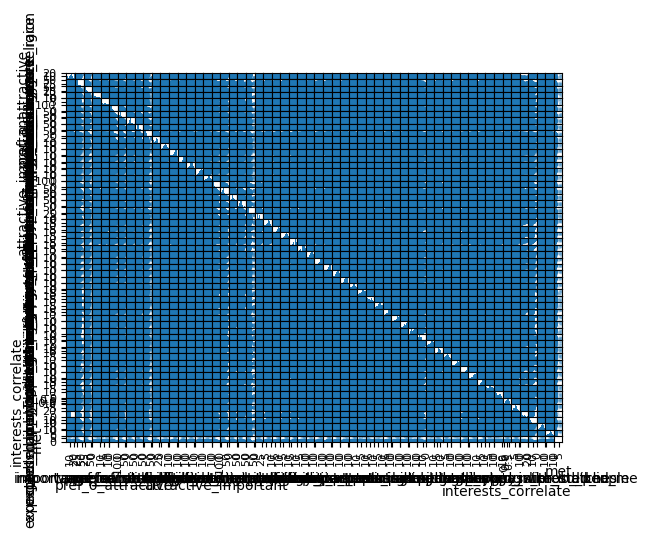

In [30]:
pd.plotting.scatter_matrix(df[df.select_dtypes(include=np.number).columns.tolist()], alpha=0.2)